# **Classificação com KNN**

* Aprendizado supervisionado
* Mapeamento de um vetor de atributos para um atributo de classe
* Seja $x_i$ um conjunto de $n$ instâncias pertencentes a uma classe $c$ 
  * $x_i$ tem dimensão $d$
  * existem $m$ classes, $c \in {c_1,...,c_m}$
* Aprendizagem é identificar a função $f$ tal que:
  * $f([x_{i1},x_{i2},...,x_{id}]) = c$

## **Classificação de Vinhos**

Esse conjunto de dados contém os resultados de uma análise química de vinhos cultivados em uma área específica da Itália. Três tipos de vinho estão representados nas 178 amostras, com os resultados de 13 análises químicas registradas para cada amostra. 

Os dados não contêm valores ausentes, apenas dados numéricos, com uma variável alvo (`wine`) de três classes (`1,2,3`) para a classificação.


## **Dicionário de variáveis**

* `Wine` - O tipo de vinho, em uma das três classes `1, 2 e 3`
* `Alcohol` - Álcool
* `Maclic.acid` - Ácido málico
* `Ash` - Cinzas
* `Acl` - Alcalinidade das cinzas
* `Mg` - Magnésio
* `Phenols` - Fenóis totais
* `Flavanoids` - flavonóides
* `Nonflavanoid.phenols` - Fenóis não flavonóides
* `Proanth` - proantocianidinas
* `Color.int` - Intensidade de cor
* `Hue` - Matiz
* `OD` - D280/OD315 de vinhos diluídos
* `Proline` - Prolina
  

## 1. Importar bibliotecas necessárias

In [78]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Análise exploratória dos dados

In [57]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('wine.csv')
dados.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Vamos verificar a frequência da nossa variável alvo (`Wine`) atráves de um gráfico de barras.


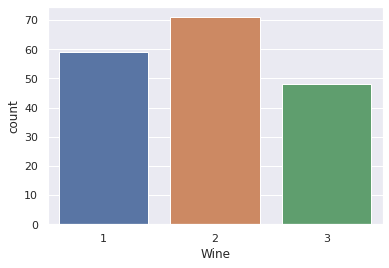

In [81]:
sns.set_theme(style="darkgrid")
sns.countplot(x ='Wine', data = dados)
plt.show()

Veremos agora a força da correlação entre as variáveis.

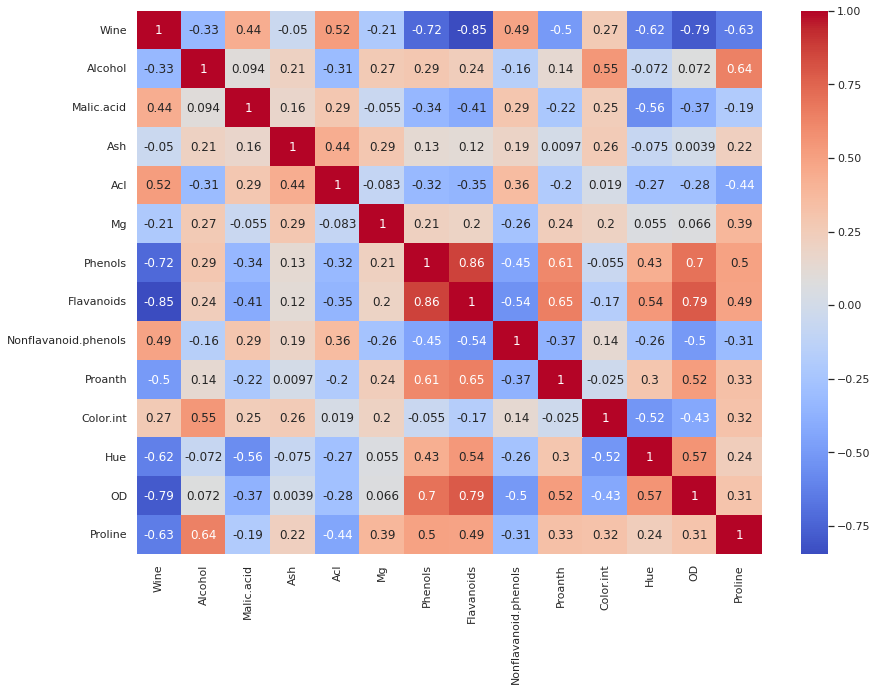

In [83]:
# plotar heatmap
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(dados.corr(), annot=True,cmap='coolwarm', ax=ax)
plt.show()

## 3. Organizando dados para modelagem

### Dividir os dados em atributos descritores e atributo de classe (target)

In [58]:
#dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,1:]
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [59]:
y = dados.Wine
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64

### Dividir os dados em treino e teste

In [60]:
from sklearn.model_selection import train_test_split

* Divide a matriz em subconjuntos aleatórios de treino e teste
* test_size: tamanho do subconjunto de teste (em percentual)
* random_state: define a semente para a aleatoriedade (se não definido, semente aleatória)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#random_state=42

In [62]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
86,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
105,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315


In [63]:
y_train.head()

86     2
74     2
121    2
109    2
105    2
Name: Wine, dtype: int64

## 4. Definindo algoritmo de aprendizado

* KNN
   * k = 3 
   * distância euclidiana

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
#definindo modelo
classificador = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [66]:
#treinando modelo
classificador.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [67]:
#realizando classificação
classificacao = classificador.predict(X_test)
classificacao

array([1, 3, 3, 1, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1])

In [68]:
for i in range(len(y_test)):
  print(y_test.iloc[i],'\t',classificacao[i])

1 	 1
3 	 3
3 	 3
1 	 1
1 	 3
3 	 2
2 	 2
1 	 1
3 	 2
2 	 3
2 	 2
1 	 3
3 	 3
1 	 2
2 	 2
2 	 2
1 	 1
2 	 2
2 	 2
2 	 2
1 	 1
3 	 2
3 	 3
3 	 2
1 	 1
1 	 1
2 	 2
1 	 1
1 	 1
2 	 2
3 	 1
3 	 1
1 	 1
2 	 2
2 	 2
1 	 1


## 5. Avaliação do classificador

* Precisamos de métricas para saber quão bem nosso modelo se comportou

* Acurácia
  * taxa de acertos do classificador
  * acerta quando classifica como maligno o que é maligno e benigno o que é benigno
  * indicação geral da performance do modelo

In [69]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [70]:
acuracia = accuracy_score(y_test,classificacao)
acuracia

0.7222222222222222

## Validação cruzada
* A forma de avaliação anterior dividiu o dataset em dois subconjuntos disjuntos: treino e teste 
  * o treino foi usado para construir o modelo
  * o teste foi usado para avaliar o modelo
  * método holdout
* No entanto, devido a aleatoriedade, o resultado pode não ser tão confiável
* Validação cruzada k-fold
  * dividir o conjunto de dados em $k$ subconjuntos (folds) disjuntos
  * um subconjunto é usado para teste
  * os outros k-1 subconjuntos são usados para criar o modelo
  * repete-se o procedimento k vezes, alternando o subconjunto de teste
  * calcula-se a acurácia média das k repetições e tem-se a avaliação do método


<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width="500">

In [71]:
# montando os folds para validação cruzada
from sklearn.model_selection import KFold

In [72]:
kf = KFold(n_splits=5)

In [73]:
#imprimindo os indices das instancias do treino e teste
for train,test in kf.split(X):
  print('Treino:',train,'\nTeste:',test)
  print('-----')

Treino: [ 36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177] 
Teste: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
-----
Treino: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 10

In [74]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [75]:
#define modelo
classificador = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [76]:
#calculando os scores
scores = cross_val_score(classificador,X,y,cv=10)
scores

array([0.66666667, 0.61111111, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.72222222, 0.77777778, 0.88235294, 0.88235294])

In [77]:
scores.mean(),scores.std()

(0.7209150326797384, 0.09062604724441718)